## Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms?

Polynomial functions and kernel functions are both used in machine learning algorithms, particularly in the context of support vector machines (SVMs) and kernel methods.

1. **Polynomial Functions:**

- In polynomial regression, polynomial functions are used to model relationships between variables by fitting a polynomial equation to the observed data points.
- In SVMs, polynomial kernels are used to transform the input data into a higher-dimensional space, where the data might be more separable. The polynomial kernel function computes the dot product between two vectors($x^Ty$) in this transformed space.

2. **Kernel Functions:**

- Kernel functions are used in various machine learning algorithms, especially in SVMs and kernelized versions of other algorithms like kernelized ridge regression, kernelized PCA, etc.
- A kernel function calculates the dot product of vectors in a higher-dimensional space without actually transforming the original data into that space. This is known as the kernel trick.
- Polynomial kernels are a specific type of kernel function used in SVMs. They compute the dot product in a higher-dimensional space defined by polynomial functions.

## Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization purposes
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='poly', degree=3)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


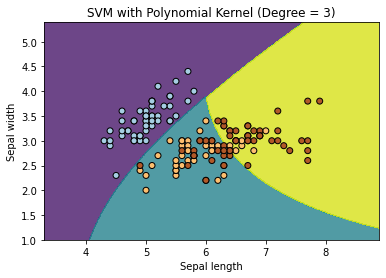

In [110]:
# Plot the decision boundary
# Creating a mesh grid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.01),
                     np.arange(start=y_min, stop=y_max, step=0.01))

# Plotting decision boundary
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM with Polynomial Kernel (Degree = 3)')
plt.show()

## Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

In Support Vector Regression (SVR), the parameter epsilon $\epsilon$ controls the width of the margin around the predicted function within which no penalty is associated in the objective function. This margin is called the **$\epsilon$-insensitive tube**.

When we increase the value of epsilon, the following things happen:

1. **Wider Margin:**

- A larger epsilon value expands the width of the $\epsilon$-insensitive tube. This means that deviations of the predictions from the true target values within this margin are not penalized.
- As the margin widens, it allows more training data points to lie within the margin without incurring any penalty.

2. **More Support Vectors:**

- Support vectors are the data points that lie on or within the margin ($\epsilon$-insensitive tube) or are misclassified.
- When the margin widens, more data points can lie within the margin without penalty. Consequently, more data points may become support vectors.
- Therefore, increasing the value of $\epsilon$ generally increases the number of support vectors.

3. **Smoother Predictions:**

- A larger $\epsilon$ value results in a smoother predicted function because it allows more training data points to be considered as support vectors. This may lead to a more generalized model.

4. **Risk of Overfitting:**

- While a wider margin can lead to a smoother prediction function, it may also increase the risk of overfitting, especially if the dataset contains noise or outliers.
- Increasing epsilon excessively might allow too many data points to be considered as support vectors, leading to a model that is overly complex and poorly generalizes to unseen data.

In summary, increasing the value of $\epsilon$ in SVR typically results in a wider margin, more support vectors, and potentially smoother predictions. However, it's essential to strike a balance and avoid setting epsilon too large to prevent overfitting and maintain good generalization performance.

## Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value?

**Support Vector Regression (SVR)** is a powerful technique for regression tasks, where the goal is to predict continuous outcomes. Like any machine learning algorithm, SVR has several hyperparameters that need to be tuned for optimal performance. Let's discuss the main parameters and their effects:

1. **Kernel Function:**

- SVR can use different kernel functions, such as **linear**, **polynomial**, **radial basis function (RBF)**, and **sigmoid**.
- The kernel function determines the shape of the decision boundary and how data in the input space is mapped into a higher-dimensional feature space.
- Choice of kernel depends on the data characteristics and the complexity of the underlying relationship between features and target.
- For example, use a linear kernel for linear relationships, RsBF for non-linear relationships with complex pattern, and polynomial for moderately non-linear relationships.

2. **C Parameter:**

- C is the **regularization parameter** in SVR. It controls the trade-off between maximizing the margin and minimizing the training error.
- A smaller C value allows for a larger margin and more tolerance of errors on the training data. This can help prevent overfitting but might lead to higher bias.
- A larger C value penalizes misclassification more heavily, leading to a smaller margin and potentially overfitting to the training data.
- Increase C if the model is underfitting (too simple) and decrease it if the model is overfitting (too complex).

3. **Epsilon Parameter ($\epsilon$):**

- Epsilon is the margin of tolerance where no penalty is given to errors.
- It specifies the epsilon-tube within which no penalty is associated with errors, effectively controlling the width of the margin.
- A smaller epsilon results in a smaller margin and a more flexible model, potentially leading to overfitting.
- A larger epsilon increases the margin and makes the model more tolerant to errors, potentially leading to underfitting.
- Adjust epsilon based on the desired balance between model flexibility and generalization.

4. **Gamma Parameter (for RBF kernel):**

- Gamma defines how far the influence of a single training example reaches.
- A small gamma value means a 'far' reach, implying that even distant points have high influence on the decision boundary. This can lead to a smoother decision boundary.
- A large gamma value means a 'close' reach, implying that only nearby points have high influence. This can lead to more complex, tightly fitted decision boundaries, potentially resulting in overfitting.
- Increase gamma if the model is underfitting and decrease it if the model is overfitting.

## Q5. Assignment:

##### - Import the necessary libraries and load the dataset
##### - Split the dataset into training and testing sets
##### - Preprocess the data using any technique of your choice (e.g. scaling, normalization)
##### - Create an instance of the SVC classifier and train it on the training data
##### - Use the trained classifier to predict the labels of the testing data
##### - Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy, precision, recall, F1-score)
##### - Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomizedSearchCV to improve its performance
##### - Train the tuned classifier on the entire dataset
##### - Save the trained classifier to a file for future use

##### Loading the dataset

Dataset - https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

##### About the dataset

**Attribute Information:**

1) ID number  
2) Diagnosis (M = malignant, B = benign)

**Ten real-valued features are computed for each cell nucleus:**

1) radius (mean of distances from center to points on the perimeter)  
2) texture (standard deviation of gray-scale values)  
3) perimeter  
4) area  
5) smoothness (local variation in radius lengths)  
6) compactness (perimeter^2 / area - 1.0)  
7) concavity (severity of concave portions of the contour)  
8) concave points (number of concave portions of the contour)  
9) symmetry  
10) fractal dimension ("coastline approximation" - 1)

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [112]:
df = pd.read_csv(filepath_or_buffer="./data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [113]:
print("The size of the dataset is:", df.shape)

The size of the dataset is: (569, 33)


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [115]:
df["Unnamed: 32"].unique()

array([nan])

##### Dropping the features "id" and "Unnamed: 32" as they are insignifact for this dataset 

In [116]:
df.drop(labels=["id", "Unnamed: 32"], axis=1, inplace=True)
df.shape

(569, 31)

In [117]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

##### The target column "diagnosis" has 2 unique values - M and B
##### M stands for Malignant (Cancerous) - mapping to 1
##### B stands for Benign (Non-cancerous) - mapping to 0

In [118]:
diagnosis_map = {"M":1, "B":0}
df["diagnosis"] = df["diagnosis"].map(diagnosis_map)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [119]:
df["diagnosis"].unique()

array([1, 0], dtype=int64)

##### So, now all the columns in the dataframe has been mapped to numerical values for the Machine Learning model to consume

In [120]:
value_counts_df=df["diagnosis"].value_counts()
value_counts_df

diagnosis
0    357
1    212
Name: count, dtype: int64

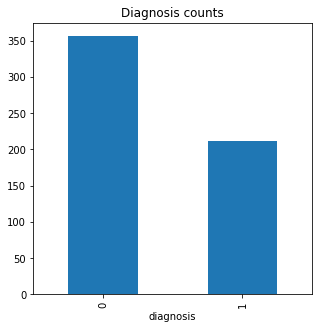

In [121]:
plt.figure(figsize=(5,5))
value_counts_df.plot(kind='bar')
plt.title("Diagnosis counts")
plt.show()

##### Split the dataset into training and testing sets

In [122]:
X = df.drop(labels=["diagnosis"], axis=1)
Y = df["diagnosis"]

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(f"The training shape is: {X_train.shape, y_train.shape}")
print(f"The test shape is: {X_test.shape, y_test.shape}")

The training shape is: ((426, 30), (426,))
The test shape is: ((143, 30), (143,))


#####  Preprocess the data using any technique of your choice (e.g. scaling, normalization)

In [124]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,426.0,14.122664,3.534740,7.691000,11.717500,13.270000,15.750000,28.11000
texture_mean,426.0,19.198850,4.230755,9.710000,16.180000,18.690000,21.587500,39.28000
perimeter_mean,426.0,91.885023,24.304457,47.920000,75.502500,85.935000,104.175000,188.50000
area_mean,426.0,654.919484,356.441156,170.400000,421.650000,545.650000,780.400000,2501.00000
smoothness_mean,426.0,0.095556,0.013971,0.052630,0.085193,0.094370,0.104275,0.16340
compactness_mean,426.0,0.102507,0.051469,0.019380,0.062460,0.090505,0.130575,0.31140
concavity_mean,426.0,0.087470,0.078612,0.000000,0.028973,0.061400,0.128775,0.42680
concave points_mean,426.0,0.047744,0.037861,0.000000,0.020325,0.033065,0.070403,0.20120
symmetry_mean,426.0,0.180024,0.026818,0.116700,0.161425,0.178150,0.195375,0.30400
fractal_dimension_mean,426.0,0.062607,0.007227,0.049960,0.057510,0.061295,0.065975,0.09744


In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

In [126]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,426.0,-6.588366e-16,1.001176,-1.821698,-0.681236,-0.241508,0.460925,3.961758
texture_mean,426.0,-2.272569e-16,1.001176,-2.245464,-0.714388,-0.120415,0.565256,4.752051
perimeter_mean,426.0,-2.731253e-16,1.001176,-1.811055,-0.674847,-0.245100,0.506262,3.979870
area_mean,426.0,4.503440e-16,1.001176,-1.360924,-0.655210,-0.306917,0.352451,5.185291
smoothness_mean,426.0,2.918896e-16,1.001176,-3.076187,-0.742686,-0.085006,0.624809,4.861839
compactness_mean,426.0,-2.981444e-16,1.001176,-1.616996,-0.778996,-0.233459,0.545989,4.063429
concavity_mean,426.0,3.440128e-17,1.001176,-1.113998,-0.745012,-0.332025,0.526045,4.321607
concave points_mean,426.0,2.668705e-16,1.001176,-1.262519,-0.725055,-0.388166,0.599167,4.057905
symmetry_mean,426.0,-1.086246e-15,1.001176,-2.364007,-0.694347,-0.069975,0.573063,4.628217
fractal_dimension_mean,426.0,-7.729863e-16,1.001176,-1.751926,-0.706044,-0.181718,0.466590,4.825355


##### Let's save the scaler model

In [127]:
import pickle

with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,file=f)

##### Create an instance of the SVC classifier and train it on the training data

In [128]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel="rbf")
svm_classifier.fit(X_train, y_train.values.flatten())

SVC()

##### Use the trained classifier to predict the labels of the testing data

In [129]:
y_pred = svm_classifier.predict(X_test)

##### Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy, precision, recall, F1-score)

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("The accuracy is:", accuracy)
print("The precision is:", precision)
print("The recall is:", recall)
print("The F1_score is:", f1)

The accuracy is: 0.972027972027972
The precision is: 0.9629629629629629
The recall is: 0.9629629629629629
The F1_score is: 0.9629629629629629


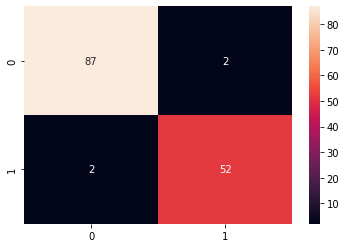

In [131]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True)
plt.show()

In [132]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



##### Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomizedSearchCV to improve its performance

In [135]:
parameters = {
    "kernel": ["rbf", "linear", "poly", "sigmoid"],
    "degree": [1,2,3,4,5,6,7],
    "C": [1, 0.1, 0.01, 0.001,],
}

In [136]:
from sklearn.model_selection import GridSearchCV

model = SVC()
classifier = GridSearchCV(estimator=model, param_grid=parameters, refit=True, cv=5, scoring="f1", verbose=3)
classifier.fit(X_train, y_train.values.flatten())

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV 1/5] END .........C=1, degree=1, kernel=rbf;, score=0.985 total time=   0.0s
[CV 2/5] END .........C=1, degree=1, kernel=rbf;, score=0.935 total time=   0.0s
[CV 3/5] END .........C=1, degree=1, kernel=rbf;, score=0.984 total time=   0.0s
[CV 4/5] END .........C=1, degree=1, kernel=rbf;, score=0.968 total time=   0.0s
[CV 5/5] END .........C=1, degree=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 1/5] END ......C=1, degree=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 2/5] END ......C=1, degree=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 3/5] END ......C=1, degree=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ......C=1, degree=1, kernel=linear;, score=0.968 total time=   0.0s
[CV 5/5] END ......C=1, degree=1, kernel=linear;, score=0.938 total time=   0.0s
[CV 1/5] END ........C=1, degree=1, kernel=poly;, score=0.985 total time=   0.0s
[CV 2/5] END ........C=1, degree=1, kernel=pol

[CV 4/5] END .........C=1, degree=6, kernel=rbf;, score=0.968 total time=   0.0s
[CV 5/5] END .........C=1, degree=6, kernel=rbf;, score=0.952 total time=   0.0s
[CV 1/5] END ......C=1, degree=6, kernel=linear;, score=0.985 total time=   0.0s
[CV 2/5] END ......C=1, degree=6, kernel=linear;, score=0.967 total time=   0.0s
[CV 3/5] END ......C=1, degree=6, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ......C=1, degree=6, kernel=linear;, score=0.968 total time=   0.0s
[CV 5/5] END ......C=1, degree=6, kernel=linear;, score=0.938 total time=   0.0s
[CV 1/5] END ........C=1, degree=6, kernel=poly;, score=0.545 total time=   0.0s
[CV 2/5] END ........C=1, degree=6, kernel=poly;, score=0.652 total time=   0.0s
[CV 3/5] END ........C=1, degree=6, kernel=poly;, score=0.609 total time=   0.0s
[CV 4/5] END ........C=1, degree=6, kernel=poly;, score=0.545 total time=   0.0s
[CV 5/5] END ........C=1, degree=6, kernel=poly;, score=0.653 total time=   0.0s
[CV 1/5] END .....C=1, degre

[CV 2/5] END ....C=0.1, degree=5, kernel=linear;, score=0.949 total time=   0.0s
[CV 3/5] END ....C=0.1, degree=5, kernel=linear;, score=0.984 total time=   0.0s
[CV 4/5] END ....C=0.1, degree=5, kernel=linear;, score=0.968 total time=   0.0s
[CV 5/5] END ....C=0.1, degree=5, kernel=linear;, score=0.970 total time=   0.0s
[CV 1/5] END ......C=0.1, degree=5, kernel=poly;, score=0.578 total time=   0.0s
[CV 2/5] END ......C=0.1, degree=5, kernel=poly;, score=0.524 total time=   0.0s
[CV 3/5] END ......C=0.1, degree=5, kernel=poly;, score=0.622 total time=   0.0s
[CV 4/5] END ......C=0.1, degree=5, kernel=poly;, score=0.476 total time=   0.0s
[CV 5/5] END ......C=0.1, degree=5, kernel=poly;, score=0.609 total time=   0.0s
[CV 1/5] END ...C=0.1, degree=5, kernel=sigmoid;, score=0.900 total time=   0.0s
[CV 2/5] END ...C=0.1, degree=5, kernel=sigmoid;, score=0.931 total time=   0.0s
[CV 3/5] END ...C=0.1, degree=5, kernel=sigmoid;, score=0.921 total time=   0.0s
[CV 4/5] END ...C=0.1, degre

[CV 4/5] END ..C=0.01, degree=3, kernel=sigmoid;, score=0.769 total time=   0.0s
[CV 5/5] END ..C=0.01, degree=3, kernel=sigmoid;, score=0.720 total time=   0.0s
[CV 1/5] END ......C=0.01, degree=4, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/5] END ......C=0.01, degree=4, kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/5] END ......C=0.01, degree=4, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5] END ......C=0.01, degree=4, kernel=rbf;, score=0.000 total time=   0.0s
[CV 5/5] END ......C=0.01, degree=4, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/5] END ...C=0.01, degree=4, kernel=linear;, score=0.969 total time=   0.0s
[CV 2/5] END ...C=0.01, degree=4, kernel=linear;, score=0.949 total time=   0.0s
[CV 3/5] END ...C=0.01, degree=4, kernel=linear;, score=0.967 total time=   0.0s
[CV 4/5] END ...C=0.01, degree=4, kernel=linear;, score=0.933 total time=   0.0s
[CV 5/5] END ...C=0.01, degree=4, kernel=linear;, score=0.933 total time=   0.0s
[CV 1/5] END .....C=0.01, de

[CV 3/5] END .....C=0.001, degree=3, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5] END .....C=0.001, degree=3, kernel=rbf;, score=0.000 total time=   0.0s
[CV 5/5] END .....C=0.001, degree=3, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/5] END ..C=0.001, degree=3, kernel=linear;, score=0.877 total time=   0.0s
[CV 2/5] END ..C=0.001, degree=3, kernel=linear;, score=0.912 total time=   0.0s
[CV 3/5] END ..C=0.001, degree=3, kernel=linear;, score=0.933 total time=   0.0s
[CV 4/5] END ..C=0.001, degree=3, kernel=linear;, score=0.877 total time=   0.0s
[CV 5/5] END ..C=0.001, degree=3, kernel=linear;, score=0.857 total time=   0.0s
[CV 1/5] END ....C=0.001, degree=3, kernel=poly;, score=0.061 total time=   0.0s
[CV 2/5] END ....C=0.001, degree=3, kernel=poly;, score=0.062 total time=   0.0s
[CV 3/5] END ....C=0.001, degree=3, kernel=poly;, score=0.062 total time=   0.0s
[CV 4/5] END ....C=0.001, degree=3, kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5] END ....C=0.001, de

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 0.1, 0.01, 0.001],
                         'degree': [1, 2, 3, 4, 5, 6, 7],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='f1', verbose=3)

In [137]:
classifier.best_params_

{'C': 1, 'degree': 1, 'kernel': 'linear'}

In [138]:
best_model = classifier.best_estimator_
best_model

SVC(C=1, degree=1, kernel='linear')

In [139]:
classifier.best_score_

0.9713047973531845

In [140]:
y_pred = best_model.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("The accuracy is:", accuracy)
print("The precision is:", precision)
print("The recall is:", recall)
print("The F1_score is:", f1)

The accuracy is: 0.972027972027972
The precision is: 0.9629629629629629
The recall is: 0.9629629629629629
The F1_score is: 0.9629629629629629


In [142]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



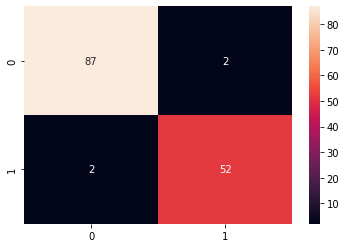

In [143]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True)
plt.show()

##### Training the best estimator on entire dataset

In [144]:
final_svc = SVC(kernel='linear',C=0.1,gamma=1)
final_svc.fit(X,Y.values.flatten())

SVC(C=0.1, gamma=1, kernel='linear')

##### Save the trained classifier file for future use

In [ ]:
import pickle

with open("svc_m")